## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `8_canopy_cover_aspect` 
### Calculate the percent canopy cover for each BAF by aspect 

Notebook contents 
* Calculate the percentage canopy cover on Cle Elum Ridge by aspect

created by Cassie Lumbrazo\
last updated: June 2024\
run location: locally\
python environment: **raster**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import geopandas as gpd

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [126]:
# define path to save the figures to
figure_path = "C:\\Users\\Lumbr\\OneDrive - UW\\Documents - mountainhydro\\People\\CassieLumbrazo\\EasternCascades\\Writing\\5_Manuscript\\2_PostDefense\\python_figures\\"

In [3]:
# Paths for local machine
# ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_all_variables.nc') 
ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_simple.nc') 

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
ds

<xarray.Dataset>
Dimensions:             (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                   (x) float64 4.65e+05 4.65e+05 ... 4.676e+05 4.676e+05
  * y                   (y) float64 2.111e+05 2.111e+05 ... 2.097e+05 2.097e+05
  * band                (band) int32 1
    spatial_ref         int32 ...
Data variables: (12/30)
    chmws_rapid         (band, y, x) float32 ...
    dce_rapid           (band, y, x) float32 ...
    giulia_dce_rapid    (band, y, x) float32 ...
    giulia_dce_ncalm    (band, y, x) float32 ...
    baf_old             (band, y, x) float32 ...
    baf_new             (band, y, x) float32 ...
    ...                  ...
    hs_ncalm            (band, y, x) float32 ...
    dem                 (band, y, x) float32 ...
    hs_rapid            (band, y, x) float32 ...
    chmas_rapid         (band, y, x) float32 ...
    dtm_rapid           (band, y, x) float32 ...
    dsm_rapid           (band, y, x) float32 ...

Define Constants

In [5]:
# because we are loading the simple dataset to save on memory, we need to calculate a few things...
# create binary object for dah
ds['dah_binary'] = np.nan
ds['dah_binary'] = ds['dah_binary'].where(~(ds['dah'] >= 0),  1)  # where DAH is greater than 0, then 1 for high heat index
ds['dah_binary'] = ds['dah_binary'].where(~(ds['dah'] <  0), -1)  # where DAH is less than or equal to 0, then -1 for low heat index

# and, make the baf_ridge binary 
ds['baf_ridge'] = ds['baf_ridge'].where(~(ds['baf_ridge'] >= 0),  1) # where not false (true) fill with 1 (south)
ds['baf_ridge'] = ds['baf_ridge'].where(~(ds['baf_ridge'] <  0), -1) # where not false (true) fill with -1 (north)

ds['baf'] = ds['baf_new'].copy(deep=True)

In [6]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

So, we want to calculate the percentage of canopy cover like before in notebook `7_canopy_cover`\
except now we want to break this up by aspect (side of the ridge)\
So I made a copy of notebook 7 to just edit the code for aspect and replot everything. 

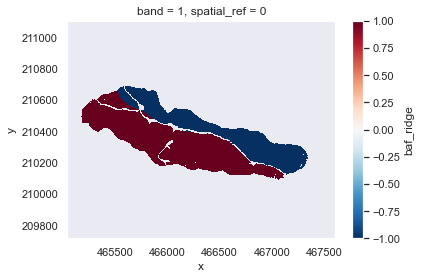

In [7]:
ds['baf_ridge'].plot()

### Calculate % Canopy Cover On Each Side of the Ridge

In [8]:
# create two versions of the dataframe, one for the north and one for the south
ds_north = ds.where(ds['baf_ridge'] == -1, drop=True)
ds_south = ds.where(ds['baf_ridge'] ==  1, drop=True)

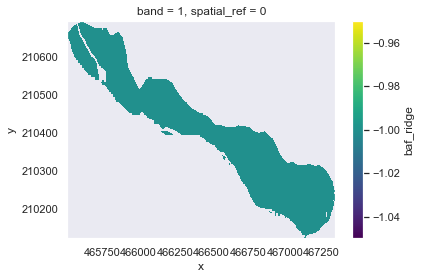

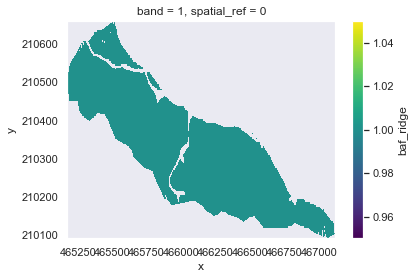

In [9]:
ds_north['baf_ridge'].plot()
plt.show()
ds_south['baf_ridge'].plot()
plt.show()

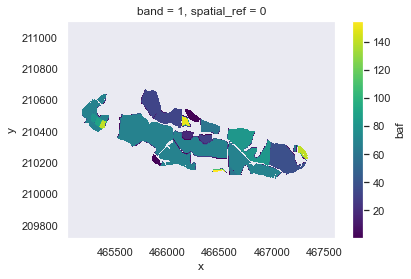

In [10]:
ds['baf'].plot()

In [107]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'pre_north', 'pre_south', 'post_north', 'post_south'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 3
    
    #_______________________________________________________________________________
    # PRE-TREATMENT
    # Determine the canopy grid cells
    canopy_mask = ds_north['chmws_ncalm'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'pre_north'] = percentage_canopy_cover.values.astype(int)
    
    #_______________________________________________________________________________
    # now, do the same thing for the south side 
    canopy_mask = ds_south['chmws_ncalm'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_south['baf'].where(ds_south['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'pre_south'] = percentage_canopy_cover.values.astype(int)

    #_______________________________________________________________________________
    # POST-TREATMENT
    # Determine the canopy grid cells
    canopy_mask = ds_north['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'post_north'] = percentage_canopy_cover.values.astype(int)
    
    #_______________________________________________________________________________
    # now, do the same thing for the south side 
    canopy_mask = ds_south['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_south['baf'].where(ds_south['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'post_south'] = percentage_canopy_cover.values.astype(int)

# Print the DataFrame
print(df)

    BAF    pre_north    pre_south   post_north   post_south
0     1           34            9           64           15
1     2  -2147483648           84  -2147483648           93
2    17            9           13            9           24
3    30  -2147483648           20  -2147483648           30
4    32           83  -2147483648           53  -2147483648
5    38           87  -2147483648           42  -2147483648
6    60           68           76           49           41
7    69            0           59            0           53
8    80  -2147483648           80  -2147483648           47
9    82           79          100           62          100
10   90  -2147483648           89  -2147483648           56
11  140           49           75           61           71
12  150           98  -2147483648           99  -2147483648
13  155  -2147483648           76  -2147483648           89


In [108]:
# cleaning up a few things
df = df.astype(int)

# drop any values < 0, and make nan 
df = df.where(df > 0)

# change the value of df['baf'] 1 to 'leave gap' and 2 to 'leave forest'
df['BAF'] = df['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

# move the leave forest to the last place in the dataframe
df = df.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

df.head()

,BAF,pre_north,pre_south,post_north,post_south
0,leave gap,34.0,9.0,64.0,15.0
2,BAF 17,9.0,13.0,9.0,24.0
3,BAF 30,NaN,20.0,NaN,30.0
4,BAF 32,83.0,NaN,53.0,NaN
5,BAF 38,87.0,NaN,42.0,NaN


But we really need this dataframe is a different structure to plot it...

In [109]:
df['pre_north'] = df['pre_north'].where(df['BAF'] != 'BAF 17', np.nan)
df['post_north'] = df['post_north'].where(df['BAF'] != 'BAF 17', np.nan)
df

,BAF,pre_north,pre_south,post_north,post_south
0,leave gap,34.0,9.0,64.0,15.0
2,BAF 17,NaN,13.0,NaN,24.0
3,BAF 30,NaN,20.0,NaN,30.0
4,BAF 32,83.0,NaN,53.0,NaN
5,BAF 38,87.0,NaN,42.0,NaN
6,BAF 60,68.0,76.0,49.0,41.0
7,BAF 69,NaN,59.0,NaN,53.0
8,BAF 80,NaN,80.0,NaN,47.0
9,BAF 82,79.0,100.0,62.0,100.0
10,BAF 90,NaN,89.0,NaN,56.0


In [110]:
# fill the pre_north column and "leave forest" row with 98 
df['pre_north'] = df['pre_north'].where(df['BAF'] != 'leave forest', 98) # filling with the BAF 150 values
df['post_north'] = df['post_north'].where(df['BAF'] != 'leave forest', 99) # filling with the BAF 150 values

# now, drop the row BAF 150 since it's the leave forest and we want it named that for now 
df = df.drop(df[df['BAF'] == 'BAF 150'].index)
df

,BAF,pre_north,pre_south,post_north,post_south
0,leave gap,34.0,9.0,64.0,15.0
2,BAF 17,NaN,13.0,NaN,24.0
3,BAF 30,NaN,20.0,NaN,30.0
4,BAF 32,83.0,NaN,53.0,NaN
5,BAF 38,87.0,NaN,42.0,NaN
6,BAF 60,68.0,76.0,49.0,41.0
7,BAF 69,NaN,59.0,NaN,53.0
8,BAF 80,NaN,80.0,NaN,47.0
9,BAF 82,79.0,100.0,62.0,100.0
10,BAF 90,NaN,89.0,NaN,56.0


In [111]:
# # the BAF 150 on the north side is the leave forest.... 
# # so let's rename BAF 150 in the dataframe to leave forest 
# df['BAF'] = df['BAF'].replace({'BAF 150': 'leave forest'})
# df

In [118]:
# make df a tidy dataframe for box plot plotting 
df_tidy = df.melt(id_vars='BAF', var_name='treatment', value_name='canopy_cover')
df_tidy

,BAF,treatment,canopy_cover
0,leave gap,pre_north,34.0
1,BAF 17,pre_north,NaN
2,BAF 30,pre_north,NaN
3,BAF 32,pre_north,83.0
4,BAF 38,pre_north,87.0
5,BAF 60,pre_north,68.0
6,BAF 69,pre_north,NaN
7,BAF 80,pre_north,NaN
8,BAF 82,pre_north,79.0
9,BAF 90,pre_north,NaN


In [123]:
# # can you make this dataframe so that the order of 'treatment' is pre_north, post_north, pre_south, post_south 
df_tidy = df_tidy.reindex([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,           #pre_north
                           26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, #post_north
                           13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, #pre_south
                           39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,  #post_south
                           ])  
df_tidy

,BAF,treatment,canopy_cover
0,leave gap,pre_north,34.0
1,BAF 17,pre_north,NaN
2,BAF 30,pre_north,NaN
3,BAF 32,pre_north,83.0
4,BAF 38,pre_north,87.0
5,BAF 60,pre_north,68.0
6,BAF 69,pre_north,NaN
7,BAF 80,pre_north,NaN
8,BAF 82,pre_north,79.0
9,BAF 90,pre_north,NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

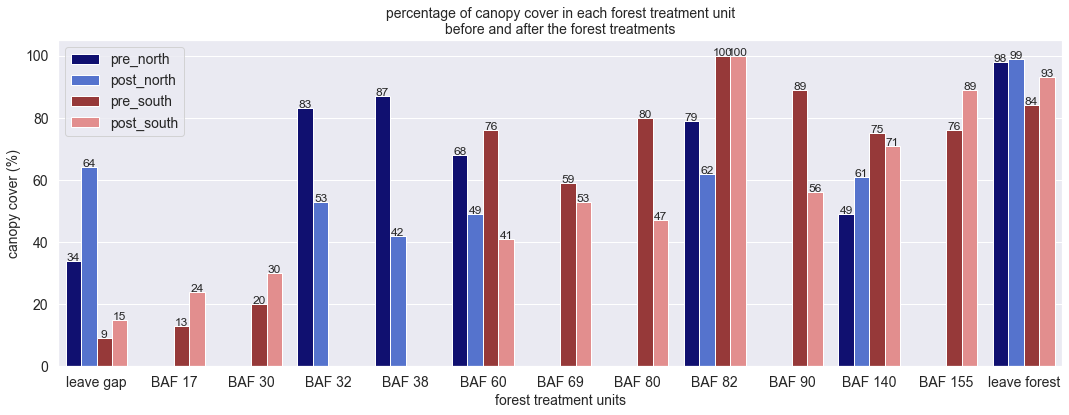

In [136]:
fig = plt.figure(figsize=(18, 6))
# palette = [colorpre, colorpos]
palette = ['navy', 'royalblue', 'brown', 'lightcoral']

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df_tidy, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('canopy cover (%)', fontsize=fontsize_num)
plt.title('percentage of canopy cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper left', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# # change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
# plt.gca().yaxis.set_label_position("right")
# plt.gca().yaxis.tick_right()

# export the figure with high resolution
figure_name = 'canopy_cover_side_of_ridge_one.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

In [120]:
df_tidy_north = df_tidy.where((df_tidy['treatment'] == 'pre_north') | (df_tidy['treatment'] == 'post_north')).dropna(how='all')
df_tidy_south = df_tidy.where((df_tidy['treatment'] == 'pre_south') | (df_tidy['treatment'] == 'post_south')).dropna(how='all')
#df_tidy_south

In [140]:
# rename the pre_north to pre-treatment and post_north to post-treatment
df_tidy_north['treatment'] = df_tidy_north['treatment'].replace({'pre_north': 'pre-treatment', 'post_north': 'post-treatment'})
df_tidy_south['treatment'] = df_tidy_south['treatment'].replace({'pre_south': 'pre-treatment', 'post_south': 'post-treatment'})
df_tidy_south.head()

,BAF,treatment,canopy_cover
13,leave gap,pre-treatment,9.0
14,BAF 17,pre-treatment,13.0
15,BAF 30,pre-treatment,20.0
16,BAF 32,pre-treatment,NaN
17,BAF 38,pre-treatment,NaN


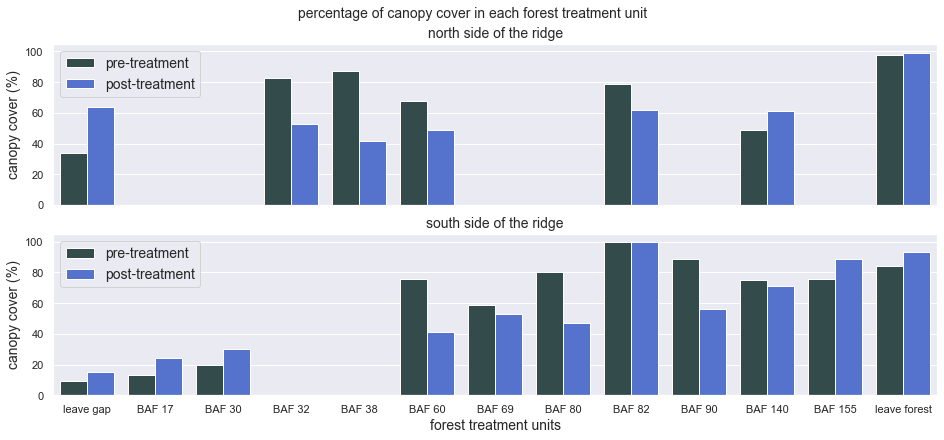

In [144]:

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(13,6), constrained_layout = True)
palette = [colorpre, colorpos]

plt.suptitle('percentage of canopy cover in each forest treatment unit', fontsize=fontsize_num)
fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data= df_tidy_north, ax=axes[0], x='BAF', y='canopy_cover', hue='treatment', palette=palette)    
barplot = sns.barplot(data= df_tidy_south, ax=axes[1], x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# # Add values on top of each bar
# for p in barplot.patches:
#     height = p.get_height()
#     plt.text(p.get_x()+p.get_width()/2., 
#              height + 0.1, 
#              '{:1.0f}'.format(height), 
#              ha="center")

# Customize the layout
axes[0].set_xlabel('')
axes[1].set_xlabel('forest treatment units', fontsize=fontsize_num)
axes[0].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[1].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[0].legend(loc='upper left', fontsize=fontsize_num)
axes[1].legend(loc='upper left', fontsize=fontsize_num)

axes[0].set_title('north side of the ridge', fontsize=fontsize_num)
axes[1].set_title('south side of the ridge', fontsize=fontsize_num)

# increase the size of the xtick labels
# axes[0].set_xticks(fontsize=fontsize_num)

# # change the ylabel to be on the right side of the figure instead 
# axes[0].set_yticks(fontsize=fontsize_num)
# plt.gca().yaxis.set_label_position("right")
# plt.gca().yaxis.tick_right()

# export the figure with high resolution
figure_name = 'canopy_cover_side_of_ridge_two.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

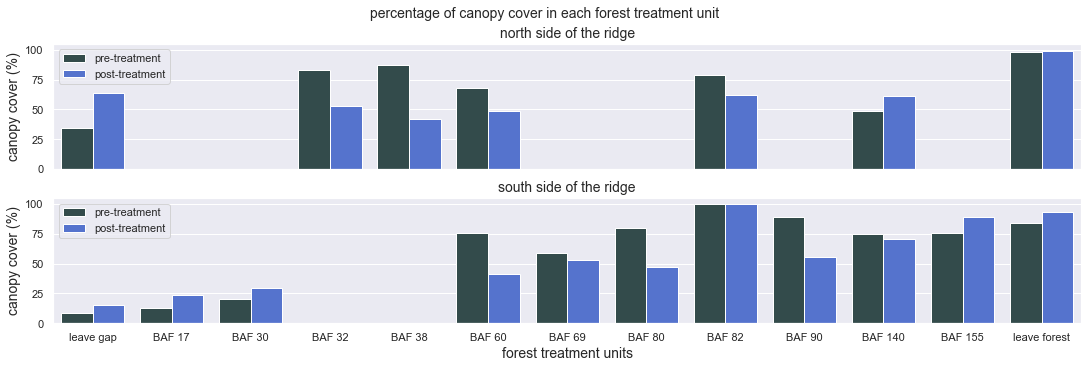

In [152]:

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,5), constrained_layout = True)
palette = [colorpre, colorpos]

plt.suptitle('percentage of canopy cover in each forest treatment unit', fontsize=fontsize_num)
fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data= df_tidy_north, ax=axes[0], x='BAF', y='canopy_cover', hue='treatment', palette=palette)    
barplot = sns.barplot(data= df_tidy_south, ax=axes[1], x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# # Add values on top of each bar
# for p in barplot.patches:
#     height = p.get_height()
#     plt.text(p.get_x()+p.get_width()/2., 
#              height + 0.1, 
#              '{:1.0f}'.format(height), 
#              ha="center")

# Customize the layout
axes[0].set_xlabel('')
axes[1].set_xlabel('forest treatment units', fontsize=fontsize_num)
axes[0].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[1].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[0].legend()
axes[1].legend()

axes[0].set_title('north side of the ridge', fontsize=fontsize_num)
axes[1].set_title('south side of the ridge', fontsize=fontsize_num)

# increase the size of the xtick labels
# axes[0].set_xticks(fontsize=fontsize_num)

# export the figure with high resolution
figure_name = 'canopy_cover_side_of_ridge_two_small.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()